In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = [0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [4]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

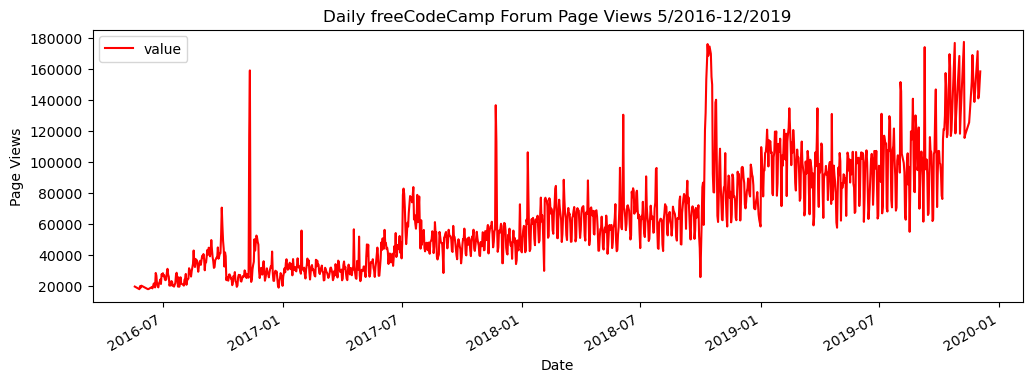

In [6]:
df_line = df.reset_index()
df_line
fig = df_line.plot(kind = 'line', x = 'date', y = 'value', figsize = (12,4), title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel = 'Date', ylabel = "Page Views", color = 'red')
fig

In [19]:
df_bar = df.copy()
df_bar['Months'] = df_bar.index.month
df_bar['Year'] = df_bar.index.year
df_bar

,value,Months,Year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [20]:
df_newBar = pd.DataFrame(df_bar.groupby(['Year', 'Months']).mean().round().rename(columns = {'value' : 'average'}))
df_newBar
#df_newBar.reset_index()

average
Year Months          
2016 5        19432.0
     6        21875.0
     7        24110.0
     8        31049.0
     9        41477.0
     10       27398.0
     11       40449.0
     12       27832.0
2017 1        32785.0
     2        31113.0
     3        29369.0
     4        30879.0
     5        34244.0
     6        43578.0
     7        65807.0
     8        47712.0
     9        47377.0
     10       47439.0
     11       57702.0
     12       48421.0
2018 1        58580.0
     2        65679.0
     3        62694.0
     4        62351.0
     5        56563.0
     6        70117.0
     7        63591.0
     8        62832.0
     9        65942.0
     10      111378.0
     11       78688.0
     12       80047.0
2019 1       102057.0
     2       105968.0
     3        91214.0
     4        89368.0
     5        91440.0
     6        90436.0
     7        97237.0
     8       102717.0
     9        97269.0
     10      122802.0
     11      143166.0
     12      150734.0

In [21]:
df_newBar = df_newBar.reset_index()


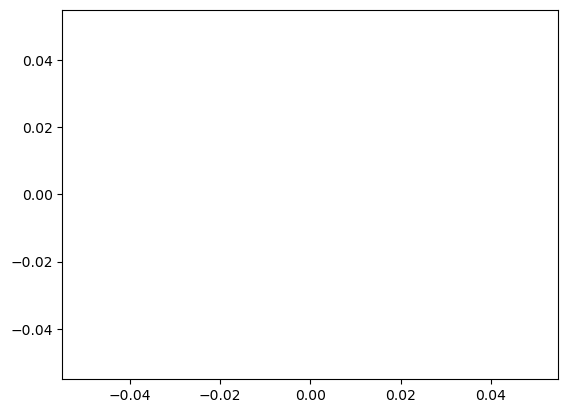

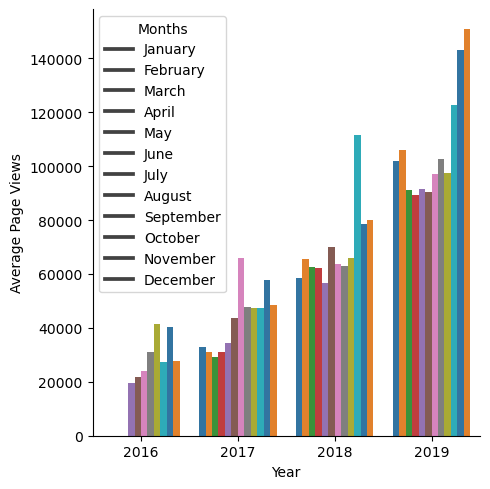

In [28]:
fig = plt.plot(figsize = (19, 3))

fig = sns.catplot(data = df_newBar, x = 'Year', y = 'average', hue = 'Months', palette = 'tab10', legend = False, kind = 'bar')
fig.set_xlabels('Year')
fig.set_ylabels('Average Page Views')
plt.legend(
    title="Months",
    loc="upper left",
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)
